# Configuracion Inicial

### Importar Librerias

In [4]:
import os
from dotenv import load_dotenv          # PARA VARIABLES DE ENTORNO
import pandas as pd                     # PARA MANIPULACION DE ARCHIVOS
import pyodbc                           # PARA CONEXION CON BASE DE DATOS
import numpy as np                      # PARA CALCULOS MATEMATICOS
import seaborn as sns                   # PARA GRAFICAS ATRACTIVAS E INFORMATIVAS
import matplotlib.pyplot as plt         # PARA GRAFICOS

### Carga de Variables de Entorno

In [19]:
load_dotenv()

DBHOST = os.getenv("DB_HOST")
DBNAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_TABLE = os.getenv("DB_TABLE")

### Conexion con base de datos

In [38]:
connection = pyodbc.connect(
    f'DRIVER={{ODBC Driver 17 for SQL Server}};'
    f'SERVER={DBHOST};'
    f'DATABASE={DBNAME};'
    f'UID={DB_USER};'
    f'PWD={DB_PASSWORD}'
)
cursor = connection.cursor()
print("Conexión exitosa a SQL Server")

Conexión exitosa a SQL Server


# 1. Preparación de datos: 

### a. Extraer los datos del archivo .csv.

In [ ]:
df = pd.read_csv("archivo.csv")
df.head()  # Mostrar primeras filas

'\ndf = pd.read_csv("archivo.csv")\ndf.head()  # Mostrar primeras filas\n'

### b. Verificar si hay valores faltantes o duplicados y decidir cómo manejarlos.

In [ ]:
# Valores faltantes por columna
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Filas duplicadas
print("Número de filas duplicadas:", df.duplicated().sum())

# Decidir cómo manejarlos:
# Aquí eliminamos filas con valores faltantes y duplicados
df = df.dropna()
df = df.drop_duplicates()

'\n# Valores faltantes por columna\nprint("Valores faltantes por columna:")\nprint(df.isnull().sum())\n\n# Filas duplicadas\nprint("Número de filas duplicadas:", df.duplicated().sum())\n\n# Decidir cómo manejarlos:\n# Aquí eliminamos filas con valores faltantes y duplicados\ndf = df.dropna()\ndf = df.drop_duplicates()\n'

### c. Asegurarse de que los tipos de datos sean correctos para cada columna.

In [ ]:
df['order_id'] = df['order_id'].astype(str)
df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')
df['customer_id'] = df['customer_id'].astype(str)
df['customer_gender'] = df['customer_gender'].astype('category')
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')
df['product_category'] = df['product_category'].astype('category')
df['product_name'] = df['product_name'].astype(str)
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['order_total'] = pd.to_numeric(df['order_total'], errors='coerce')
df['payment_method'] = df['payment_method'].astype('category')
df['shipping_region'] = df['shipping_region'].astype('category')

# Revisar tipos
df.dtypes


"\ndf['order_id'] = df['order_id'].astype(str)\ndf['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')\ndf['customer_id'] = df['customer_id'].astype(str)\ndf['customer_gender'] = df['customer_gender'].astype('category')\ndf['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')\ndf['product_category'] = df['product_category'].astype('category')\ndf['product_name'] = df['product_name'].astype(str)\ndf['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')\ndf['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')\ndf['order_total'] = pd.to_numeric(df['order_total'], errors='coerce')\ndf['payment_method'] = df['payment_method'].astype('category')\ndf['shipping_region'] = df['shipping_region'].astype('category')\n\n# Revisar tipos\ndf.dtypes\n"

### d. Cargar los datos a una base de datos SQL en la nube.

In [ ]:
# Crear tabla si no existe
create_table_query = f"""
IF OBJECT_ID('{DB_TABLE}', 'U') IS NULL
CREATE TABLE {DB_TABLE} (
    order_id NVARCHAR(50),
    purchase_date DATETIME,
    customer_id NVARCHAR(50),
    customer_gender NVARCHAR(10),
    customer_age INT,
    product_category NVARCHAR(50),
    product_name NVARCHAR(100),
    product_price FLOAT,
    quantity INT,
    order_total FLOAT,
    payment_method NVARCHAR(50),
    shipping_region NVARCHAR(50)
)
"""
cursor.execute(create_table_query)
connection.commit()

# Habilitar inserción masiva rápida
cursor.fast_executemany = True

# Preparar la consulta
insert_query = f"""
INSERT INTO {DB_TABLE} (
    order_id, purchase_date, customer_id, customer_gender,
    customer_age, product_category, product_name,
    product_price, quantity, order_total,
    payment_method, shipping_region
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
"""

# Convertir DataFrame a lista de tuplas
data_tuples = list(df.itertuples(index=False, name=None))

# Insertar todos los datos de una sola vez
cursor.executemany(insert_query, data_tuples)
connection.commit()

print(f"Datos cargados correctamente a la tabla '{DB_TABLE}'")


'\n# Crear tabla si no existe\ncreate_table_query = f"""\nIF OBJECT_ID(\'{DB_TABLE}\', \'U\') IS NULL\nCREATE TABLE {DB_TABLE} (\n    order_id NVARCHAR(50),\n    purchase_date DATETIME,\n    customer_id NVARCHAR(50),\n    customer_gender NVARCHAR(10),\n    customer_age INT,\n    product_category NVARCHAR(50),\n    product_name NVARCHAR(100),\n    product_price FLOAT,\n    quantity INT,\n    order_total FLOAT,\n    payment_method NVARCHAR(50),\n    shipping_region NVARCHAR(50)\n)\n"""\ncursor.execute(create_table_query)\nconnection.commit()\n\n# Habilitar inserción masiva rápida\ncursor.fast_executemany = True\n\n# Preparar la consulta\ninsert_query = f"""\nINSERT INTO {DB_TABLE} (\n    order_id, purchase_date, customer_id, customer_gender,\n    customer_age, product_category, product_name,\n    product_price, quantity, order_total,\n    payment_method, shipping_region\n) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)\n"""\n\n# Convertir DataFrame a lista de tuplas\ndata_tuples = list(df.i

# 2. Analisis Exploratorio

### a. Obtener los datos de la base de datos. 

In [23]:
query = f"SELECT * FROM {DB_TABLE}"
df = pd.read_sql(query, connection)
data = df.head()
connection.close()

columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

#OMITIR LAS COLUMNAS NUMERICAS DE ID
columnas_numericas = [col for col in df.select_dtypes(include=[np.number]).columns 
                      if 'id' not in col.lower()]

C:\Users\eduar\AppData\Local\Temp\ipykernel_3512\2394473011.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


### b. Calcular estadísticas básicas (media, mediana, moda) para las variables numéricas.

In [24]:
# FLUJO NORMAL
for column in columnas_numericas:
    print("\n" + "-" * 20,end="")
    print(column.upper(), end="")
    print("-" * 20)
    
    data = df[column].dropna()
    
    if len(data) > 0:
        media = data.mean()              #MEDIA
        mediana = data.median()          #MEDIANA
        moda = data.mode()
        
        print(f"Media: {media:.2f}")
        print(f"Mediana: {mediana:.2f}")
        if len(moda) == 1:
            print(f"Moda: {moda.iloc[0]:.2f}")
        else:
            print(f"Modas múltiples: {[round(x, 2) for x in moda]}")
        
    else:
        print("Error. no hay data para calcular datos estadisticos")
    



--------------------CUSTOMER_AGE--------------------
Media: 43.10
Mediana: 38.00
Moda: 32.00

--------------------PRODUCT_PRICE--------------------
Media: 104.92
Mediana: 104.69
Modas múltiples: [17.97, 51.74, 100.7, 116.16, 179.95]

--------------------QUANTITY--------------------
Media: 2.99
Mediana: 3.00
Moda: 2.00

--------------------ORDER_TOTAL--------------------
Media: 313.67
Mediana: 252.56
Modas múltiples: [139.5, 150.2, 575.6]


### c. Crear visualizaciones para mostrar la distribución de ventas por categoría de producto y región. 

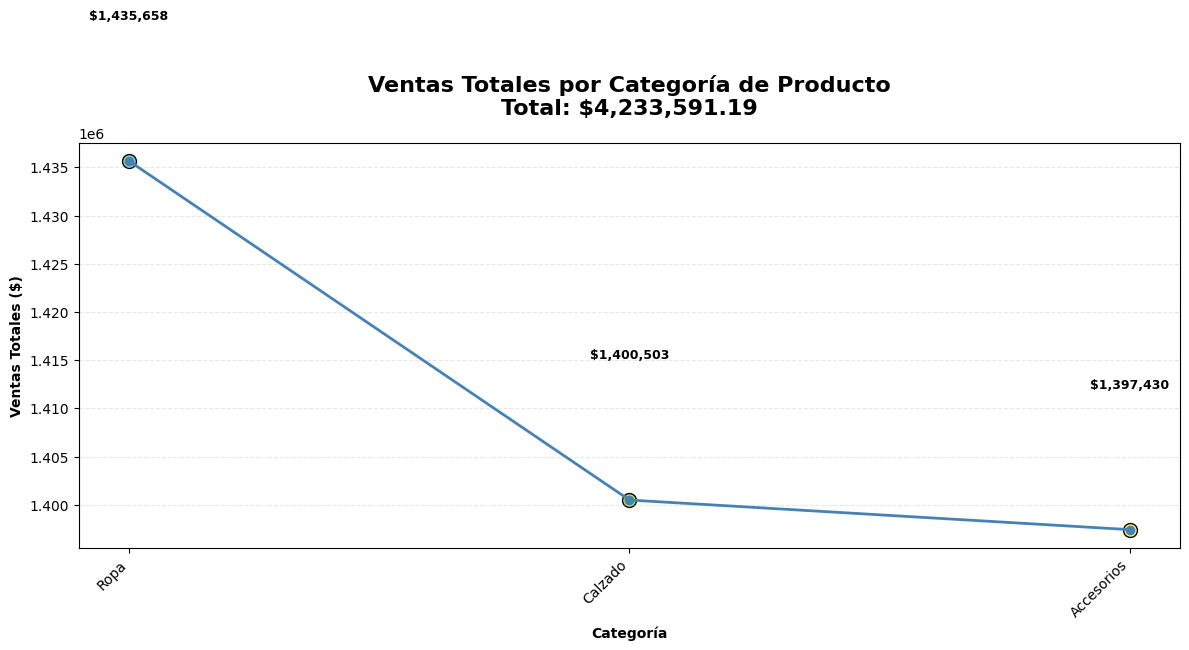

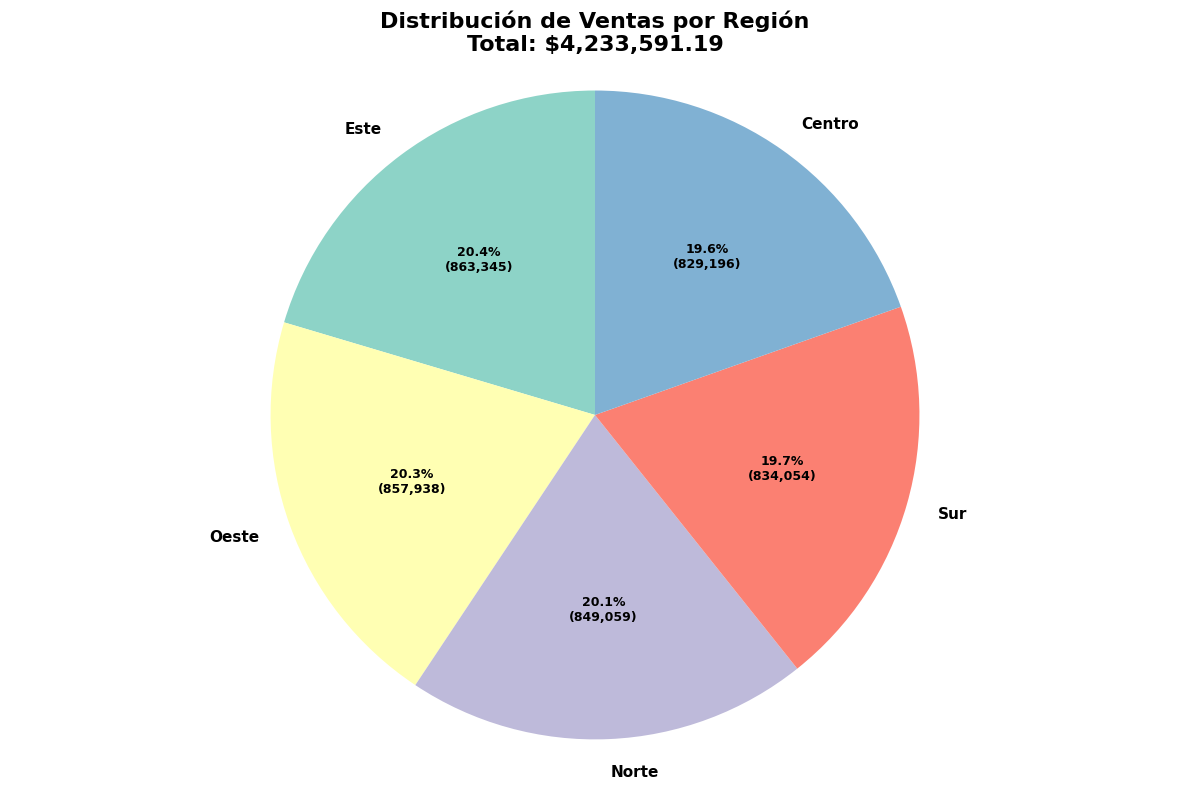

In [25]:
# Configuración básica
plt.style.use('default')
sns.set_palette("Set2")

# VENTAS POR CATEGORIA
plt.figure(figsize=(12, 7))

ventas_categoria = df.groupby('product_category')['order_total'].sum().sort_values(ascending=False)
total_ventas = ventas_categoria.sum()

# Colores para cada punto
colors = plt.cm.Set3(np.linspace(0, 1, len(ventas_categoria)))

# Línea con marcadores
plt.plot(ventas_categoria.index, ventas_categoria.values, 
         marker='o', linewidth=2, color='steelblue')

# Colorear cada punto distinto
for i, (x, y) in enumerate(ventas_categoria.items()):
    plt.scatter(x, y, color=colors[i], s=100, edgecolor='black')

# Título y etiquetas
plt.title(f'Ventas Totales por Categoría de Producto\nTotal: ${total_ventas:,.2f}', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Categoría', fontweight='bold')
plt.ylabel('Ventas Totales ($)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Etiquetas en los puntos
for i, (categoria, valor) in enumerate(ventas_categoria.items()):
    plt.text(i, valor + (max(ventas_categoria.values) * 0.01), 
             f'${valor:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


# VENTAS POR REGION
ventas_region = df.groupby('shipping_region')['order_total'].sum().sort_values(ascending=False)
total_ventas = ventas_region.sum()
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:,})'
    return my_autopct
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    ventas_region.values,
    labels=ventas_region.index,
    autopct=make_autopct(ventas_region.values),
    startangle=90,
    colors=plt.cm.Set3.colors
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

plt.title(f'Distribución de Ventas por Región\nTotal: ${total_ventas:,.2f}', 
          fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. Análisis de tendencias:

### a. Determinar los meses con mayores y menores ventas.

In [27]:
# Ventas por mes
query_mes = """
SELECT FORMAT(purchase_date, 'yyyy-MM') AS mes,
       SUM(order_total) AS total_ventas
FROM order_data
GROUP BY FORMAT(purchase_date, 'yyyy-MM')
ORDER BY total_ventas DESC
"""
df_mes = pd.read_sql(query_mes, connection)

print("Meses con mayores ventas:")
display(df_mes.head(10))

print("Meses con menores ventas:")
display(df_mes.tail(10))


C:\Users\cutza\AppData\Local\Temp\ipykernel_22468\637604686.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mes = pd.read_sql(query_mes, connection)


Meses con mayores ventas:


,mes,total_ventas
0,2023-07,374627.04
1,2023-08,374009.71
2,2023-03,373066.15
3,2023-06,369023.84
4,2023-01,365113.80
5,2023-10,364085.85
6,2023-05,346935.03
7,2023-11,344742.93
8,2023-12,344171.64
9,2023-02,332064.46


Meses con menores ventas:


,mes,total_ventas
2,2023-03,373066.15
3,2023-06,369023.84
4,2023-01,365113.80
5,2023-10,364085.85
6,2023-05,346935.03
7,2023-11,344742.93
8,2023-12,344171.64
9,2023-02,332064.46
10,2023-04,329510.78
11,2023-09,316239.96


### b. Identificar los productos más vendidos y los menos populares. 

In [32]:
# Productos más vendidos (por cantidad)
query_productos = """
SELECT product_name,
       SUM(quantity) AS total_vendido
FROM order_data
GROUP BY product_name
ORDER BY total_vendido DESC
"""
df_productos = pd.read_sql(query_productos, connection)

print("Productos más vendidos:")
display(df_productos.head(10))

print("Productos menos vendidos:")
display(df_productos.tail(10))


C:\Users\cutza\AppData\Local\Temp\ipykernel_22468\829572178.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(query_productos, connection)


Productos más vendidos:


,product_name,total_vendido
0,Gorro,2898
1,Chaqueta,2873
2,Sweater,2867
3,Zapatos formales,2727
4,Sandalias,2719
5,Cinturón,2704
6,Camiseta,2680
7,Zapatillas,2668
8,Pantuflas,2664
9,Pantalón,2643


Productos menos vendidos:


,product_name,total_vendido
5,Cinturón,2704
6,Camiseta,2680
7,Zapatillas,2668
8,Pantuflas,2664
9,Pantalón,2643
10,Bufanda,2642
11,Bolso,2621
12,Botas,2587
13,Vestido,2575
14,Reloj,2527


# 4. Segmentación de clientes:

### a. Agrupar a los clientes por edad y analizar sus patrones de compra.

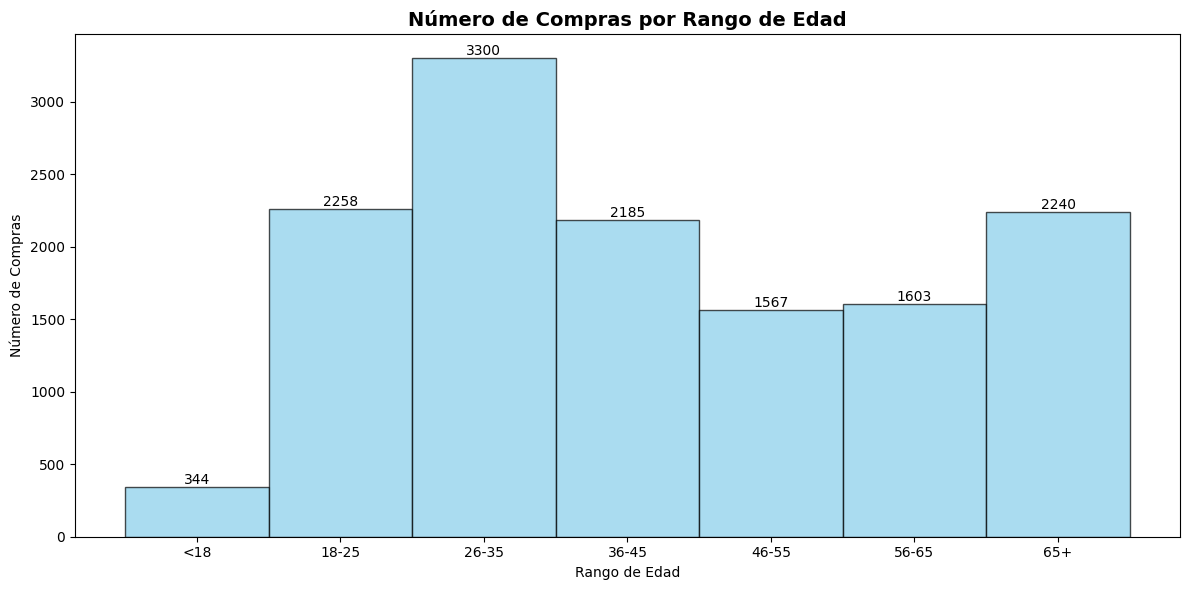

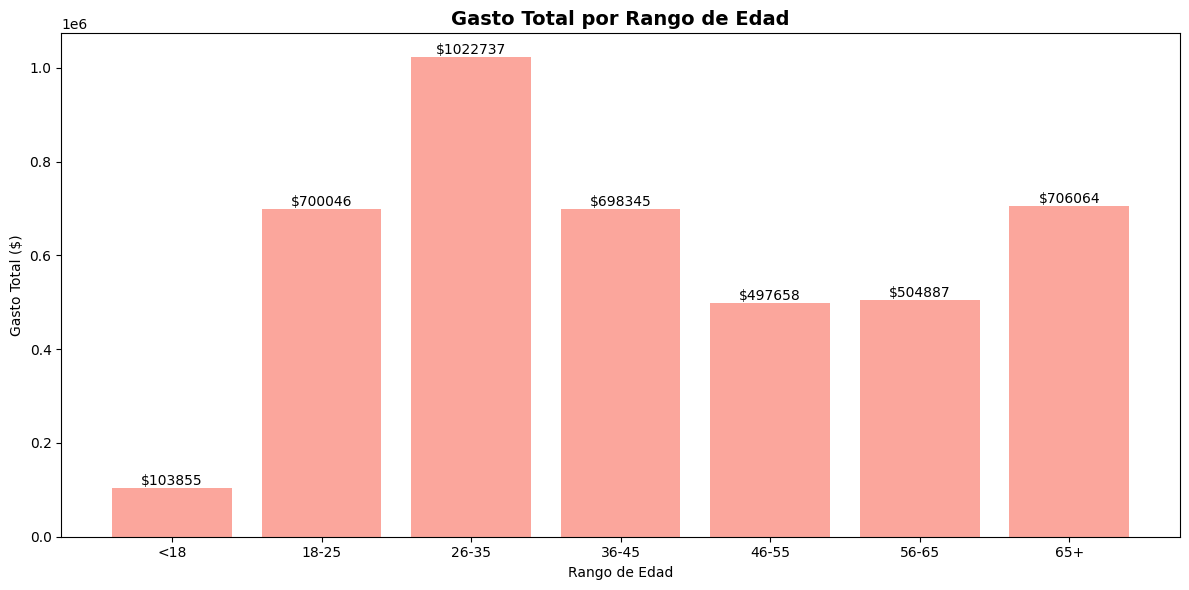

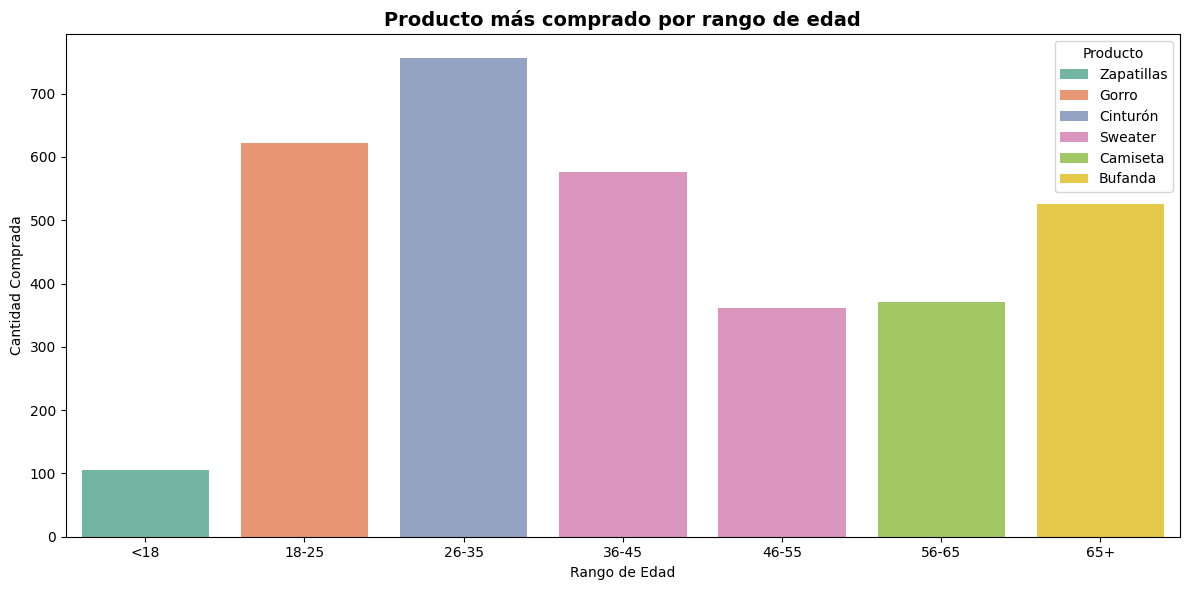

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('default')
sns.set_palette("husl")

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['rango_edad'] = pd.cut(df['customer_age'], bins=bins, labels=labels)

analisis_edad = df.groupby('rango_edad', observed=False).agg({
    'order_total': ['count', 'mean', 'sum'],
    'quantity': 'mean',
    'product_price': 'mean'
}).round(2)

analisis_edad.columns = ['num_compras', 'ticket_promedio', 'gasto_total', 'cantidad_promedio', 'precio_promedio']
productos_edad = df.groupby(['rango_edad', 'product_name'], observed=False)['quantity'].sum().reset_index()
productos_edad = productos_edad.sort_values(['rango_edad', 'quantity'], ascending=[True, False])
top_productos = productos_edad.groupby('rango_edad', observed=False).first().reset_index()

# GRAFICA DE NUMERO DE COMPRAS POR RANGO DE EDAD
plt.figure(figsize=(12, 6))
x = np.arange(len(analisis_edad.index))
bars = plt.bar(x, analisis_edad['num_compras'], width=1.0, color='skyblue', alpha=0.7, edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.title('Número de Compras por Rango de Edad', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Compras')
plt.xticks(x, analisis_edad.index)  # Etiquetas de los rangos
plt.tight_layout()
plt.show()


#GRAFICA DE GASTO TOTAL POR EDAD
plt.figure(figsize=(12, 6))
bars2 = plt.bar(analisis_edad.index, analisis_edad['gasto_total'], color='salmon', alpha=0.7)
plt.title('Gasto Total por Rango de Edad', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad')
plt.ylabel('Gasto Total ($)')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'${height:.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


#GRAFICA DE PRODUCTO MAS COMPRAD POR EDAD
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_productos,
    x='rango_edad',
    y='quantity',
    hue='product_name',
    dodge=False,  # evita separar barras
    palette='Set2'
)
plt.title('Producto más comprado por rango de edad', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad Comprada')
plt.legend(title='Producto')
plt.tight_layout()
plt.show()

### b. Comparar el comportamiento de compra entre géneros.

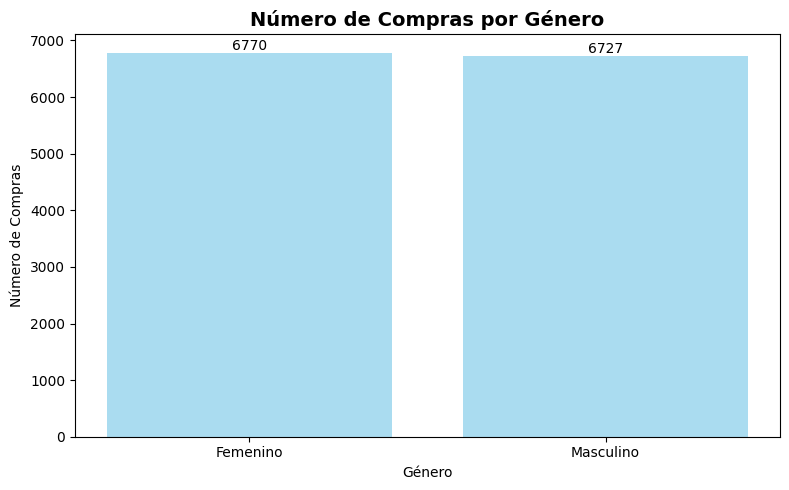

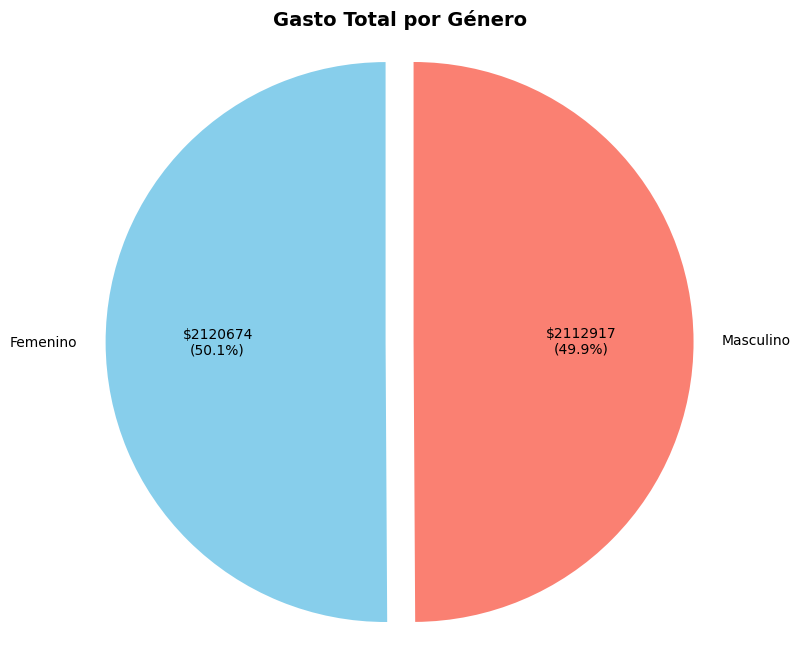

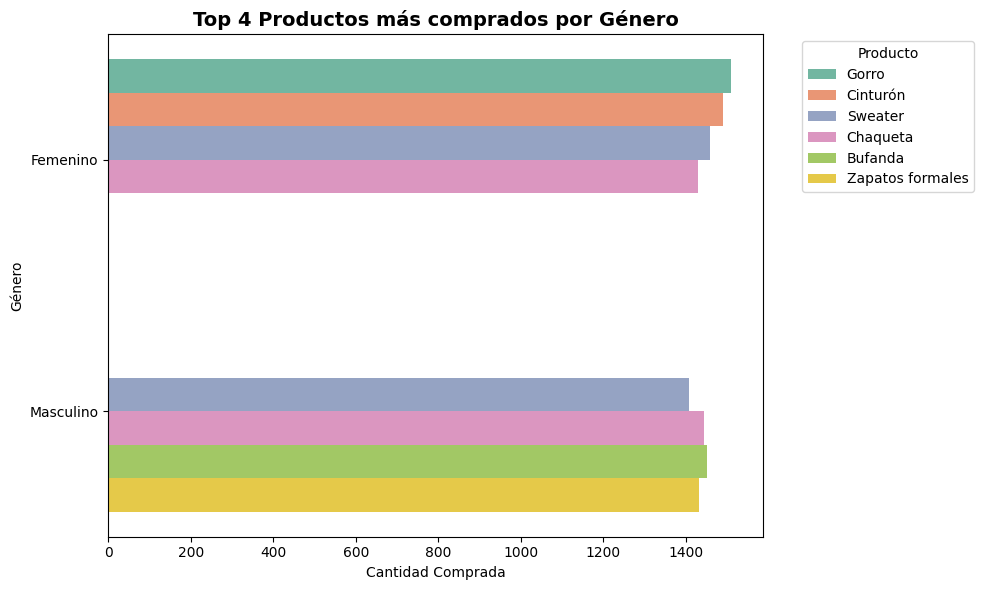

In [27]:
plt.style.use('default')
sns.set_palette("husl")

# -----------------------------
# Métricas por género
# -----------------------------
analisis_genero = df.groupby('customer_gender', observed=False).agg({
    'order_total': ['count', 'mean', 'sum'],
    'quantity': 'mean',
    'product_price': 'mean'
}).round(2)

analisis_genero.columns = ['num_compras', 'ticket_promedio', 'gasto_total', 'cantidad_promedio', 'precio_promedio']


# NUMERO DE COMPRAS POR GENERO
plt.figure(figsize=(8, 5))
bars = plt.bar(analisis_genero.index, analisis_genero['num_compras'], color='skyblue', alpha=0.7)
plt.title('Número de Compras por Género', fontsize=14, fontweight='bold')
plt.xlabel('Género')
plt.ylabel('Número de Compras')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# GRAFICA DE GASTO TOTAL POR GENERO
def autopct_valores(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"${absolute}\n({pct:.1f}%)"

# GRAFICA DE GASTO TOTAL POR GENERO - PIE CHART
plt.figure(figsize=(8, 8))
plt.pie(
    analisis_genero['gasto_total'],
    labels=analisis_genero.index,
    autopct=lambda pct: autopct_valores(pct, analisis_genero['gasto_total']),
    startangle=90,
    colors=['skyblue', 'salmon'],
    explode=[0.05, 0.05]
)
plt.title('Gasto Total por Género', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# GRAFICA DE PRODUCTOS MAS COMPRADOS POR GENERO
productos_genero = df.groupby(['customer_gender', 'product_name'], observed=False)['quantity'].sum().reset_index()
productos_genero = productos_genero.sort_values(['customer_gender', 'quantity'], ascending=[True, False])
top_productos_genero = productos_genero.groupby('customer_gender', observed=False).head(4).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_productos_genero,
    y='customer_gender',  # eje Y será el género
    x='quantity',         # eje X será la cantidad
    hue='product_name',
    dodge=True,           # separa las barras por producto
    palette='Set2'
)
plt.title('Top 4 Productos más comprados por Género', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad Comprada')
plt.ylabel('Género')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 5. Análisis de correlación: 

### a. Investigar si existe una relación entre el total de la orden y la edad del cliente.

C:\Users\cutza\AppData\Local\Temp\ipykernel_22468\3648498647.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_relacion_edad = pd.read_sql("""


Coeficiente de correlación de Pearson: 0.011 (p-valor=0.187)


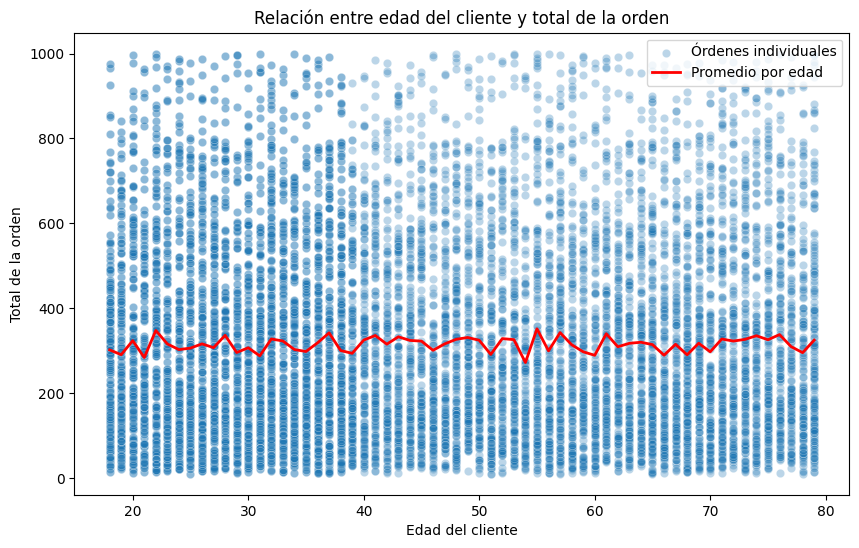

In [40]:
df_relacion_edad = pd.read_sql("""
SELECT customer_age, order_total
FROM order_data
""", connection)

# Asegurarnos de que las columnas tengan el tipo correcto
df_relacion_edad["customer_age"] = pd.to_numeric(df_relacion_edad["customer_age"])
df_relacion_edad["order_total"] = pd.to_numeric(df_relacion_edad["order_total"])

# Correlación
pearson_corr, p_val = pearsonr(df_relacion_edad['customer_age'], df_relacion_edad['order_total'])
print(f"Coeficiente de correlación de Pearson: {pearson_corr:.3f} (p-valor={p_val:.3f})")

# Promedio de total de orden por edad (para suavizar el ruido)
df_promedio = df_relacion_edad.groupby("customer_age")["order_total"].mean().reset_index()

# Visualización
plt.figure(figsize=(10,6))

# Scatterplot original
sns.scatterplot(x="customer_age", y="order_total", data=df_relacion_edad, alpha=0.3, label="Órdenes individuales")

# Línea de tendencia del promedio
sns.lineplot(x="customer_age", y="order_total", data=df_promedio, color="red", linewidth=2, label="Promedio por edad")

plt.xlabel("Edad del cliente")
plt.ylabel("Total de la orden")
plt.title("Relación entre edad del cliente y total de la orden")
plt.legend()
plt.show()


### b. Examinar si hay una correlación entre la categoría del producto y el método de pago preferido.

Chi-cuadrado=6.431, p-valor=0.377
No hay relación significativa


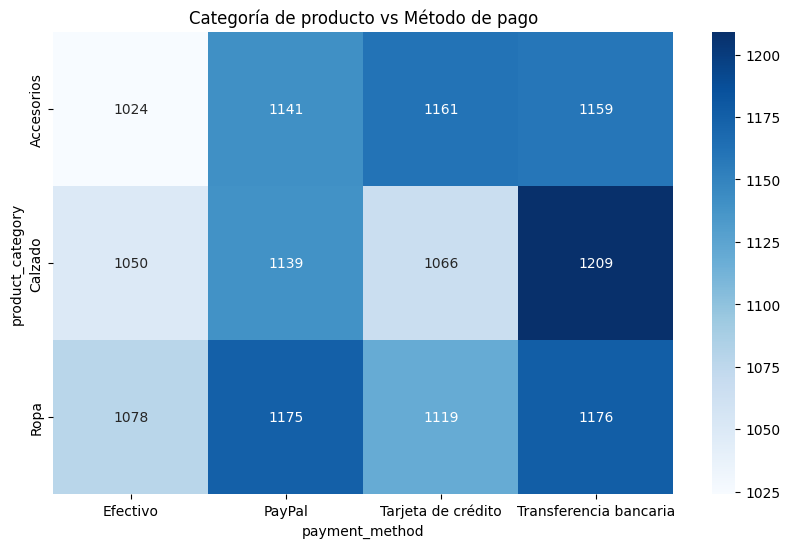

In [34]:
from scipy.stats import chi2_contingency

# Tabla de contingencia
contingencia = pd.crosstab(df['product_category'], df['payment_method'])

# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingencia)
print(f"Chi-cuadrado={chi2:.3f}, p-valor={p:.3f}")
if p < 0.05:
    print("Existe relación significativa entre categoría de producto y método de pago")
else:
    print("No hay relación significativa")

# Visualización
plt.figure(figsize=(10,6))
sns.heatmap(contingencia, annot=True, fmt="d", cmap="Blues")
plt.title("Categoría de producto vs Método de pago")
plt.show()


# 7. Conclusiones y recomendaciones: 

### a. Basándose en el análisis realizado, proporcionar al menos cuatro conclusiones clave sobre las ventas y el comportamiento de los clientes.

Respuesta Luis 
+ Ahora que ya sabemos cuales son los meses donde existe una alta y baja demanda la empresa puede prepararse de mejor manera para solventar estos casos.

+ Enfocar una mejor estrategia para la venta de los productos más vendidos además de poder identificar los menos vendidos y crear otra estrategia para que estos puedan ser más consumidos.

Respuesta Eduardo
+ El comportamiento de las ventas respecto a los clientes, es mayor en los rangos de edad de entre 26 y 35 años

+ No hay mucha diferencia entre compras del genero femenino y genero masculino, ya que la diferencia entre compra es del 1% entre los géneros

### b. Sugerir dos acciones concretas por estudiante que la empresa podría tomar para mejorar sus ventas o la satisfacción del cliente.

Respuesta Luis

+ Crear promociones para los productos más vendidos y analizar la posibilidad de retirar los productos menos vendidos o crear una estrategia para mejorar la visibilidad de estos.

+ Como se determino que no existe una relación entre la edad y el monto de la orden la empresa deberia de clasificar a los clientes en función de su comportamiento de compra.

Respuesta Eduardo

+ Implementar un programa de fidelizacion de clientes basado en la acumulacion de puntos que puedan canjearse por beneficios exclusivos o productos especificos. Esto incentivara las compras y la satisfaccion de los clientes.

+ Diseñar promociones dirigidas a los clientes con menor nivel de compra. De esta forma se motiva su participacion y contribuye al incremento de ventas.

# 8. Responder a las preguntas:

### a. ¿Cómo podrían los insights obtenidos ayudar a diferenciarse de la competencia?

R1:// al identificar los productos mas populares la empresa puede crear promociones, ofreciendo ventajas que la competencia no tiene y asi ofrecer una mejor experiencia de compra, ganando ventaja competitiva

### b. ¿Qué decisiones estratégicas podrían tomarse basándose en este análisis para aumentar las ventas y la satisfacción del cliente?

R1:// ya que hay ventas mas altas en personas de entre 26 y 35 años, se podrian realizar promociones dirigidas a otras edades, ya que asi se podrian incentivar sus compras aumentandos tanto las ventas como satisfaccion del cliente

### c. ¿Cómo podría este análisis de datos ayudar a la empresa a ahorrar costos o mejorar la eficiencia operativa?

R1:// Como se puede observar, hay productos que estan con baja demanda, y con el analisis se puede ajustar la empresa para que al momento de hacer pedidos se soliciten menos productos de los que casi no se venden, esto ayuda a reducir costos y optimizar la eficiencia operativa.

### d. ¿Qué datos adicionales recomendarían recopilar para obtener insights aún más valiosos en el futuro?

R1:// Comentarios y opiniones de los clientes, asi conocer la opinion que tienen las personas hacia el producto, esto ayudaría a identificar oportunidades de mejora.